# Project 12: Explanatory Data Analysis Challenge (Olympic Games)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 12 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [1]:
import pandas as pd

In [2]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [4]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [6]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [18]:
winter['Edition'] = 'Winter'
summer['Edition'] = 'Summer'

olympics = pd.concat([winter, summer], ignore_index=True)
olympics = olympics.merge(dic, how='left', left_on='Country', right_on='Code').drop(columns=['Code']).rename(columns={'Country_y': 'Country', 'Country_x': 'Country Code'})

## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! (Alternatively, you can find a Solution for this at the end of this Notebook!) 

In [31]:
missingCountries = {'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

def fillMissingCountries(row):
    if row['Country Code'] in list(missingCountries.keys()):
        return missingCountries[row['Country Code']]
    return row['Country']

olympics['Country'] = olympics.apply(fillMissingCountries, axis=1)

## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [39]:
olympics = olympics.dropna(subset=['Country']).reset_index(drop=True)
olympics['Medal'] = olympics['Medal'].astype('category')
olympics['Medal'].cat.set_categories(['Bronze', 'Silver', 'Gold'], ordered=True, inplace=True)

## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [78]:
top10TotalCountries = olympics['Country'].value_counts().head(10)
top10WinterCountries = olympics[olympics['Edition'] == 'Winter']['Country'].value_counts().head(10)
top10SummerCountries = olympics[olympics['Edition'] == 'Summer']['Country'].value_counts().head(10)
top10GoldCountries = olympics[olympics['Medal'] == 'Gold']['Country'].value_counts().head(10)
top10SilverCountries = olympics[olympics['Medal'] == 'Silver']['Country'].value_counts().head(10)
top10BronzeCountries = olympics[olympics['Medal'] == 'Bronze']['Country'].value_counts().head(10)

top10Total = olympics[olympics['Country'].isin(top10TotalCountries.index)]

editionMask1 = olympics.apply(lambda row: row['Country'] in top10WinterCountries.index and row['Edition'] == 'Winter', axis=1)
editionMask2 = olympics.apply(lambda row: row['Country'] in top10SummerCountries.index and row['Edition'] == 'Summer', axis=1)
top10ByEdition = pd.concat([olympics[editionMask1], olympics[editionMask2]], ignore_index=False)

top10Gold = olympics[olympics['Country'].isin(top10GoldCountries.index)]
top10Silver = olympics[olympics['Country'].isin(top10SilverCountries.index)]
top10Bronze = olympics[olympics['Country'].isin(top10BronzeCountries.index)]

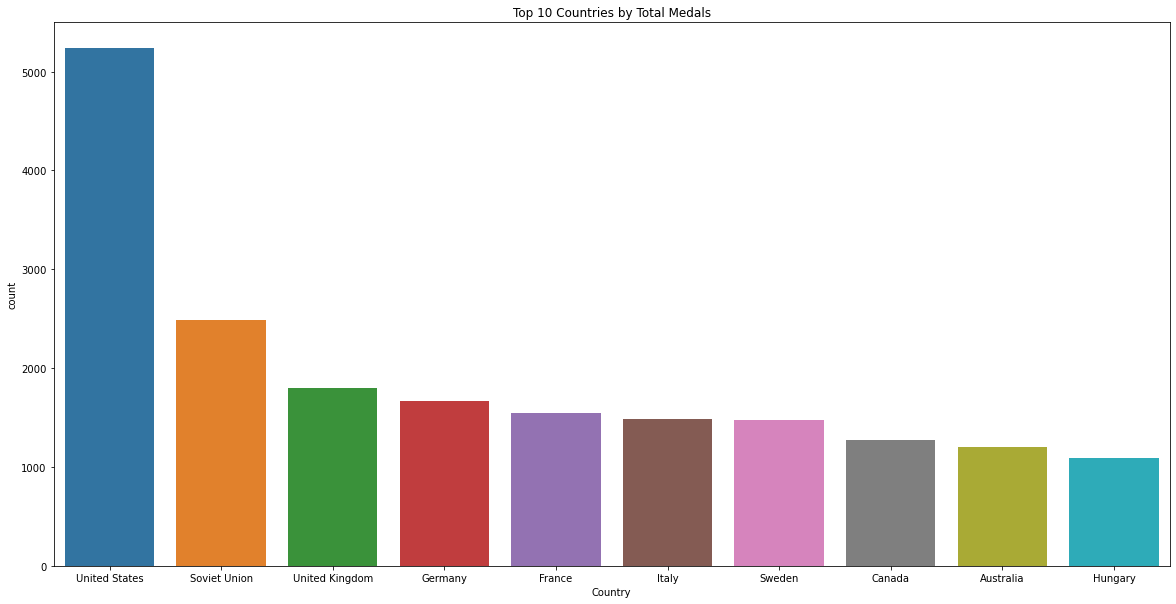

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.countplot(data=top10Total, x='Country', order=top10TotalCountries.index)
plt.title('Top 10 Countries by Total Medals')
plt.show()

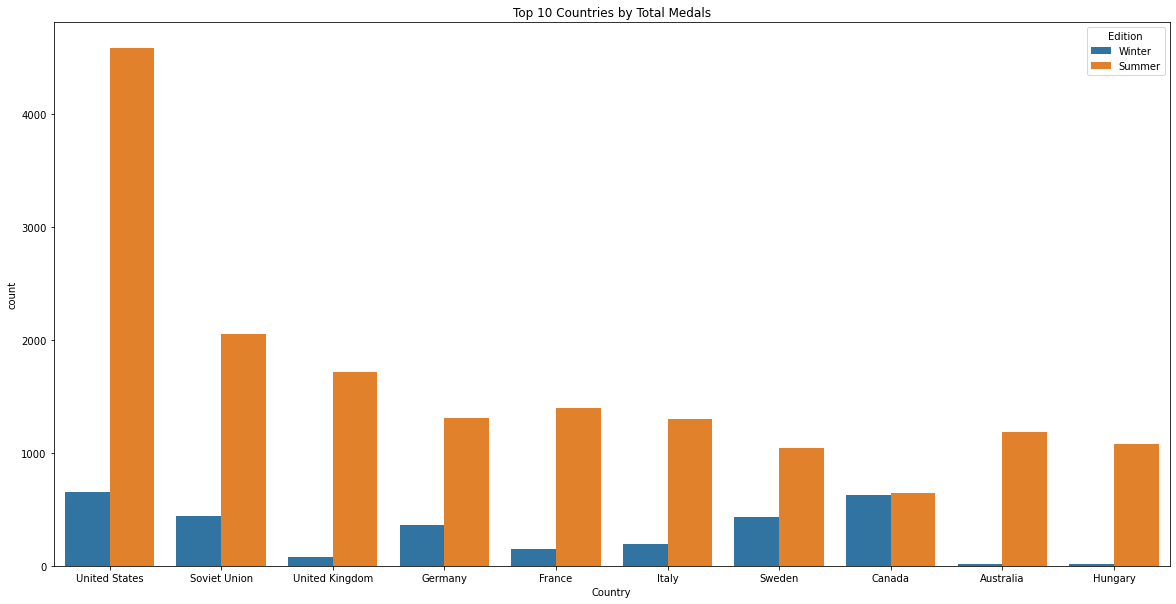

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(data=top10Total, x='Country', order=top10TotalCountries.index, hue='Edition')
plt.title('Top 10 Countries by Total Medals Divided By Edition')
plt.show()

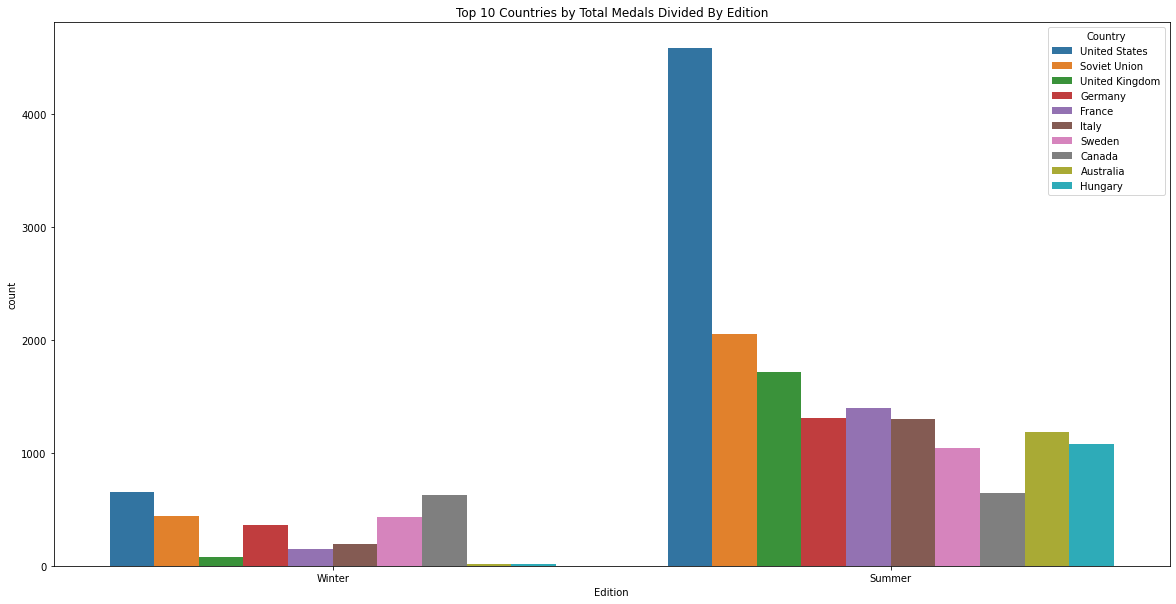

In [85]:
plt.figure(figsize=(20,10))
sns.countplot(data=top10Total, x='Edition', hue_order=top10TotalCountries.index, hue='Country')
plt.title('Top 10 Countries by Total Medals Divided By Edition')
plt.show()

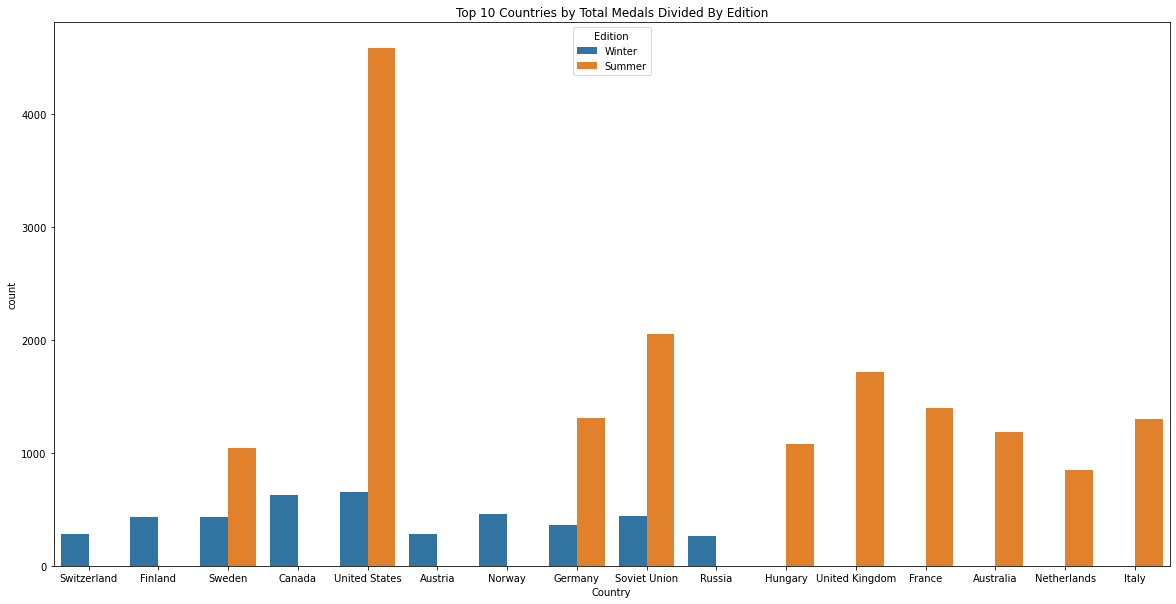

In [83]:
plt.figure(figsize=(20,10))
sns.countplot(data=top10ByEdition, x='Country', hue='Edition')
plt.title('Top 10 Countries by Total Medals Divided By Edition')
plt.show()

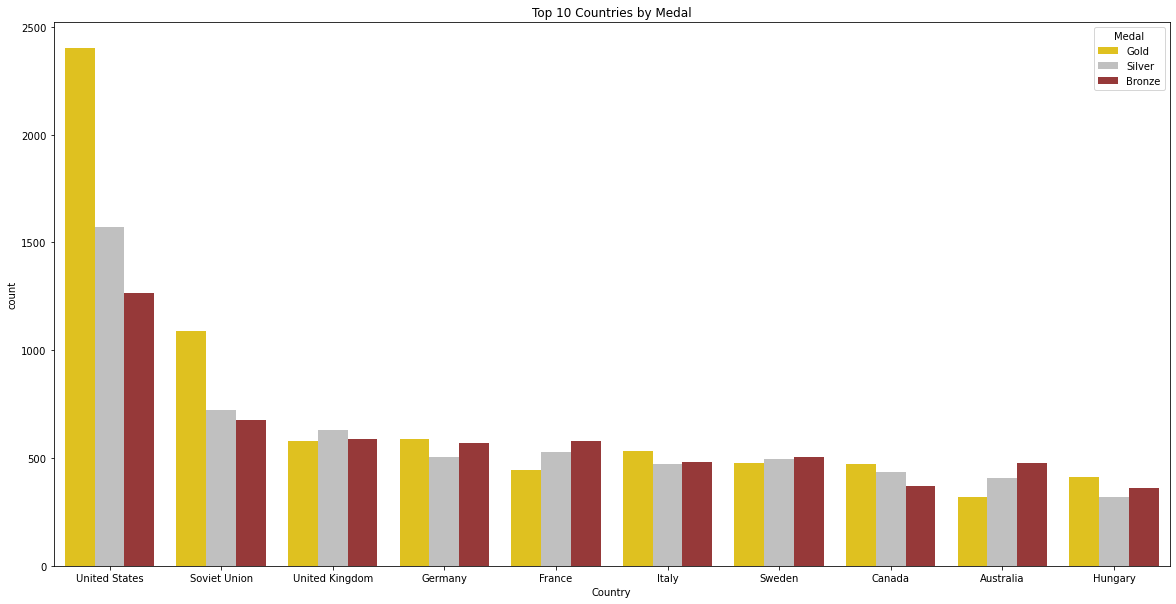

In [88]:
plt.figure(figsize=(20,10))
sns.countplot(data=top10Total, x='Country', hue='Medal', order=top10TotalCountries.index,
             hue_order=['Gold', 'Silver', 'Bronze'], palette=['gold', 'silver', 'brown'])
plt.title('Top 10 Countries by Medal')
plt.show()

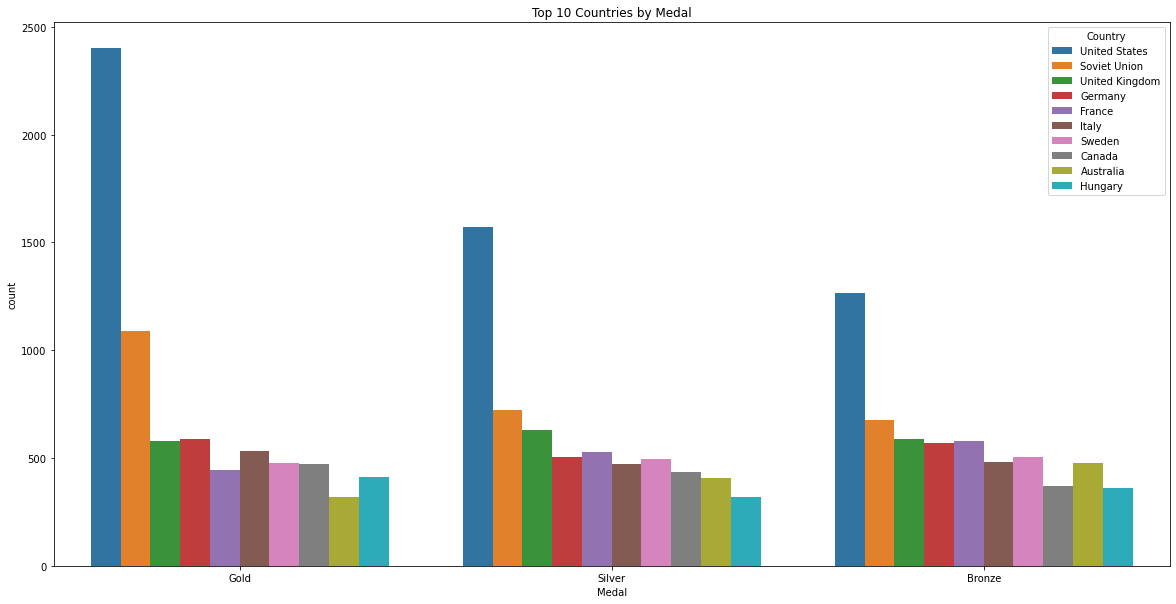

In [90]:
plt.figure(figsize=(20,10))
sns.countplot(data=top10Total, x='Medal', order=['Gold', 'Silver', 'Bronze'], hue='Country', hue_order=top10TotalCountries.index)
plt.title('Top 10 Countries by Medal')
plt.show()

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

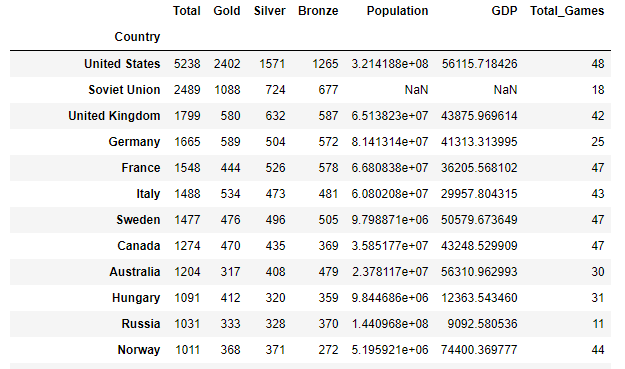

2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

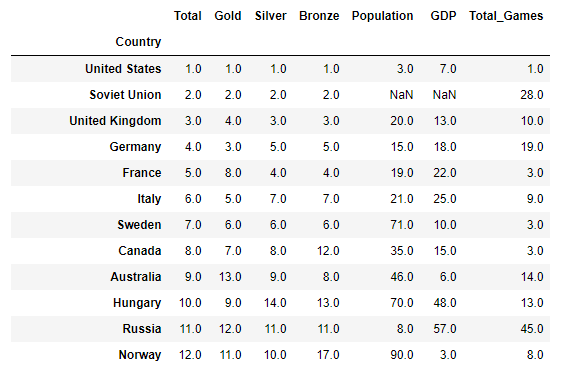

In [120]:
olympics['Game'] = olympics.apply(lambda row: str(row['Year']) + '-' + row['Edition'], axis=1)
medalsPerCountry = pd.crosstab(index=olympics['Country'], columns = olympics['Medal'], margins=True, margins_name='Total').drop('Total')
perCountryDetails = olympics.loc[:, ['Country', 'Population', 'GDP per Capita']].drop_duplicates().set_index('Country')
medalsPerCountry = medalsPerCountry.merge(perCountryDetails, how='left', left_index=True, right_index=True)
medalsPerCountry['Total Games'] = olympics.groupby(['Country'])['Game'].nunique()
medalsPerCountry.sort_values('Total', ascending=False, inplace=True)
medalsPerCountryRank = medalsPerCountry.rank(ascending=False)

## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

In [128]:
import scipy.stats as stats

In [129]:
print('Pearson')
medalsPerCountry.loc[:, ['Total', 'Population', 'GDP per Capita', 'Total Games']].corr('pearson')

Pearson


,Total,Population,GDP per Capita,Total Games
Total,1.000000,0.207996,0.440221,0.713499
Population,0.207996,1.000000,-0.090703,0.124834
GDP per Capita,0.440221,-0.090703,1.000000,0.566653
Total Games,0.713499,0.124834,0.566653,1.000000


In [130]:
print('Spearman')
medalsPerCountry.loc[:, ['Total', 'Population', 'GDP per Capita', 'Total Games']].corr('spearman')

Spearman


,Total,Population,GDP per Capita,Total Games
Total,1.000000,0.420060,0.459602,0.924521
Population,0.420060,1.000000,-0.238446,0.402739
GDP per Capita,0.459602,-0.238446,1.000000,0.497975
Total Games,0.924521,0.402739,0.497975,1.000000


In [141]:
# Does Population correlate with Total Medals? (Spearman)
corr, p = stats.spearmanr(medalsPerCountry['Total'], medalsPerCountry['Population'], nan_policy='omit')
print(corr)
round(p, ndigits=5)

0.42006017467907425


0.0

In [142]:
# Does GDP correlate with Total Medals? (Spearman)
corr, p = stats.spearmanr(medalsPerCountry['Total'], medalsPerCountry['GDP per Capita'], nan_policy='omit')
print(corr)
round(p, ndigits=5)

0.4596021020854347


0.0

In [143]:
# Does Participation correlate with Total Medals? (Spearman)
corr, p = stats.spearmanr(medalsPerCountry['Total'], medalsPerCountry['Total Games'], nan_policy='omit')
print(corr)
round(p, ndigits=5)

0.9245211456159245


0.0

## Aggregating and Ranking

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

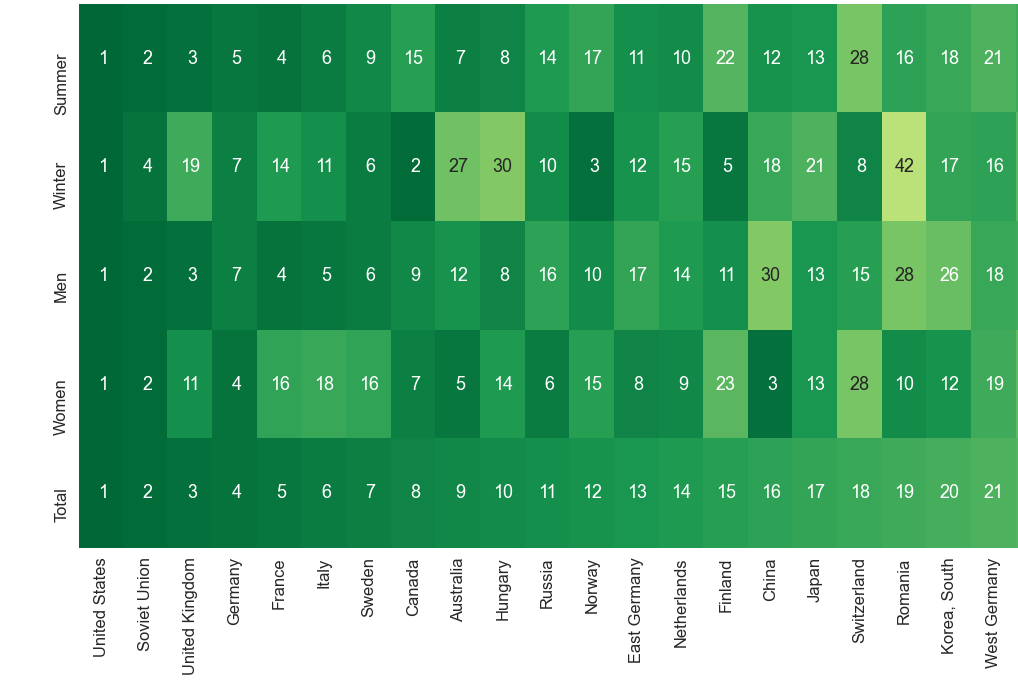

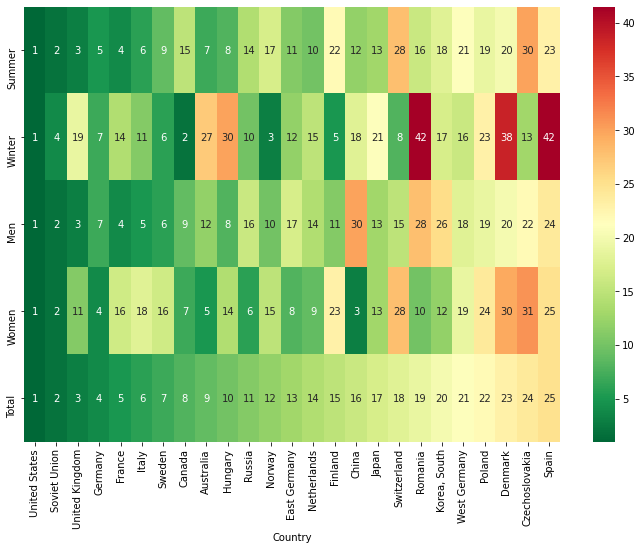

In [157]:
MedalsByCountryAndEdition = pd.crosstab(olympics['Country'], columns=olympics['Edition'])
MedalsByCountryAndGender = pd.crosstab(olympics['Country'], columns=olympics['Gender'])
medalsByCategory = pd.concat([MedalsByCountryAndEdition, MedalsByCountryAndGender], axis=1)
medalsByCategory['Total'] = medalsByCategory['Summer'] + medalsByCategory['Winter']
medalsByCategoryRank = medalsByCategory.rank(ascending=False).sort_values('Total')

plt.figure(figsize=(12,8))
sns.heatmap(medalsByCategoryRank.head(25).T, cmap='RdYlGn_r', annot=True)
plt.show()

## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

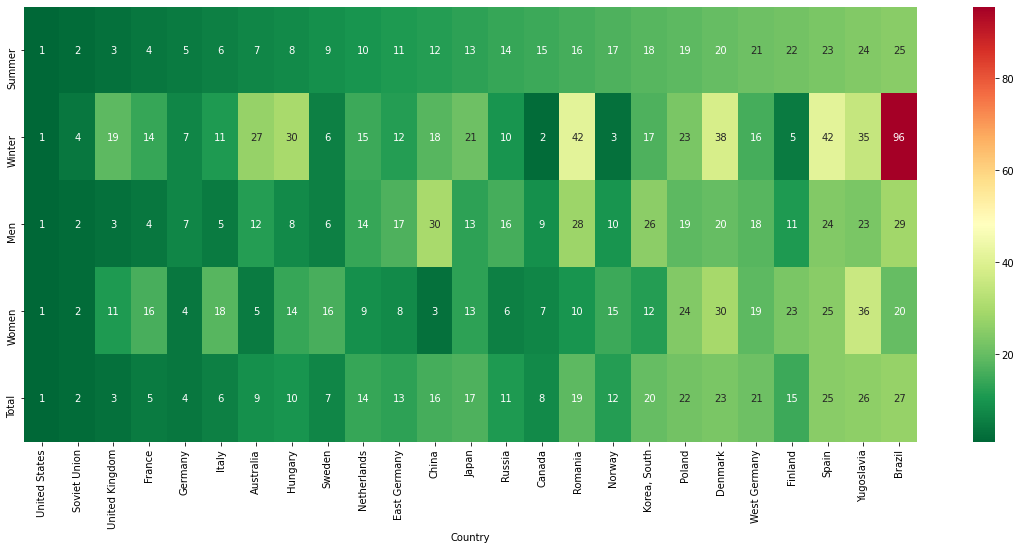

In [161]:
plt.figure(figsize=(20,8))
sns.heatmap(medalsByCategoryRank.sort_values('Summer').head(25).T, cmap='RdYlGn_r', annot=True)
plt.show()

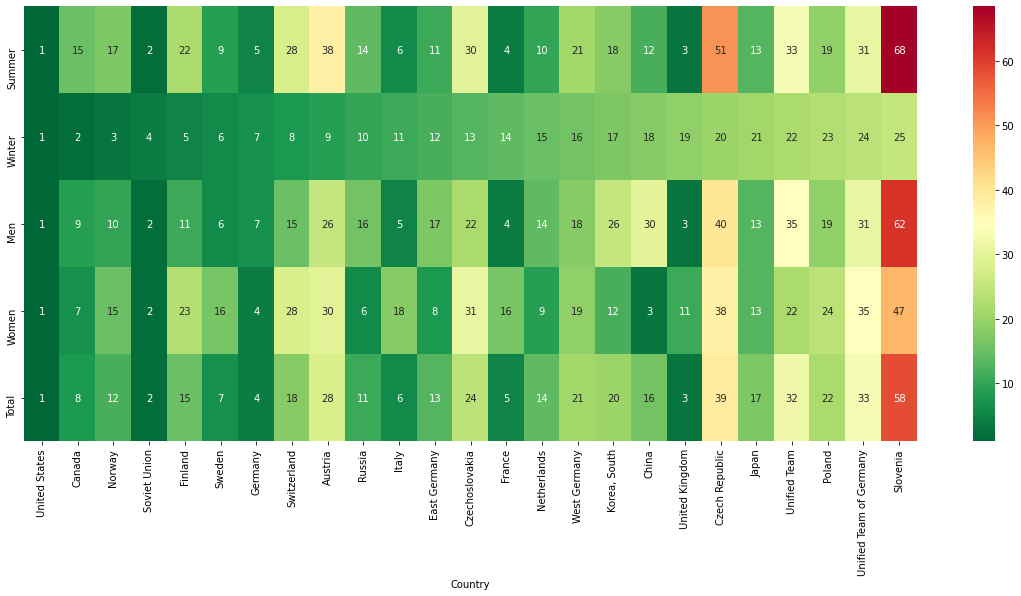

In [162]:
plt.figure(figsize=(20,8))
sns.heatmap(medalsByCategoryRank.sort_values('Winter').head(25).T, cmap='RdYlGn_r', annot=True)
plt.show()

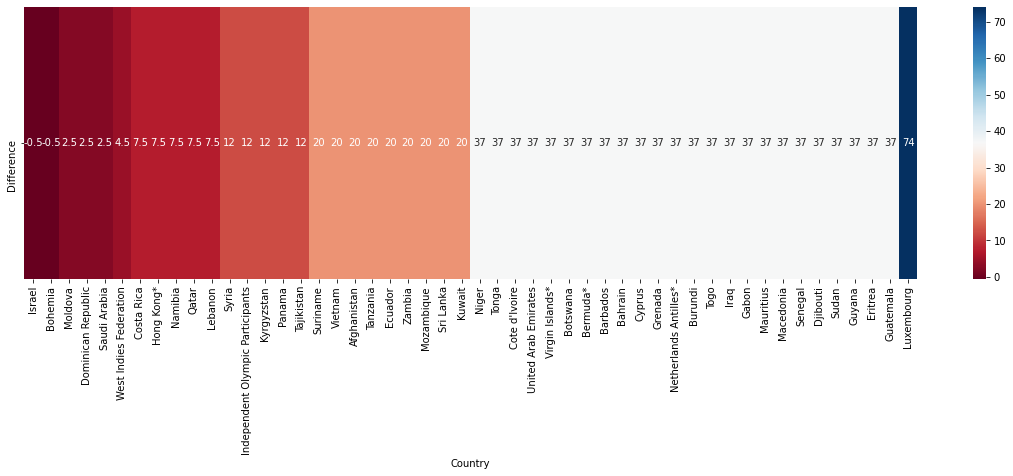

In [185]:
top50 = medalsByCategoryRank.sort_values('Total', ascending=False).head(50)
rankDiff = (top50['Summer'] - top50['Winter']).to_frame().rename(columns={0: 'Difference'}).sort_values('Difference')

plt.figure(figsize=(20,5))
sns.heatmap(rankDiff.T, cmap='RdBu', annot=True)
plt.show()

## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

What could be the reasons?

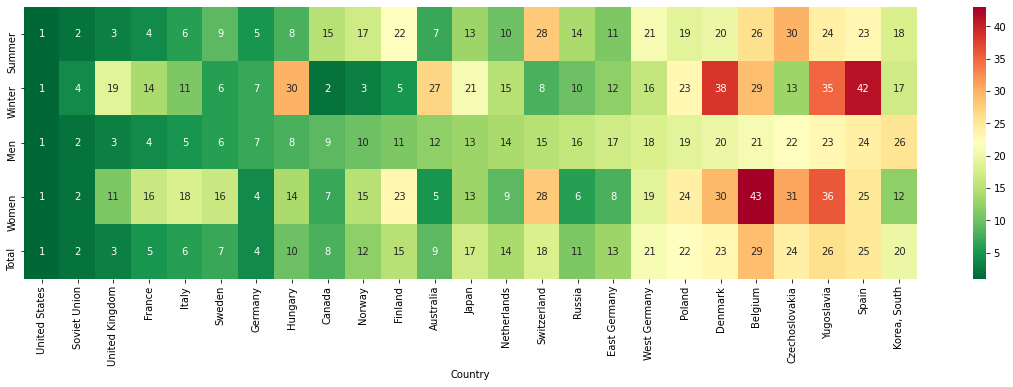

In [179]:
plt.figure(figsize=(20,5))
sns.heatmap(medalsByCategoryRank.sort_values('Men').head(25).T, cmap='RdYlGn_r', annot=True)
plt.show()

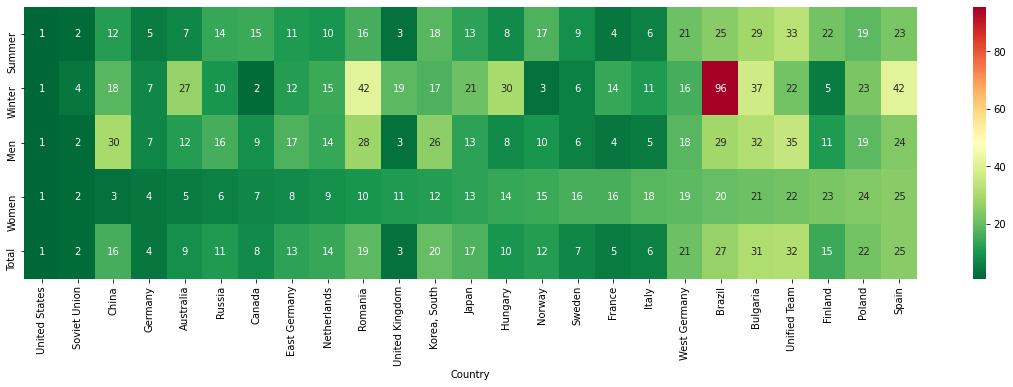

In [180]:
plt.figure(figsize=(20,5))
sns.heatmap(medalsByCategoryRank.sort_values('Women').head(25).T, cmap='RdYlGn_r', annot=True)
plt.show()

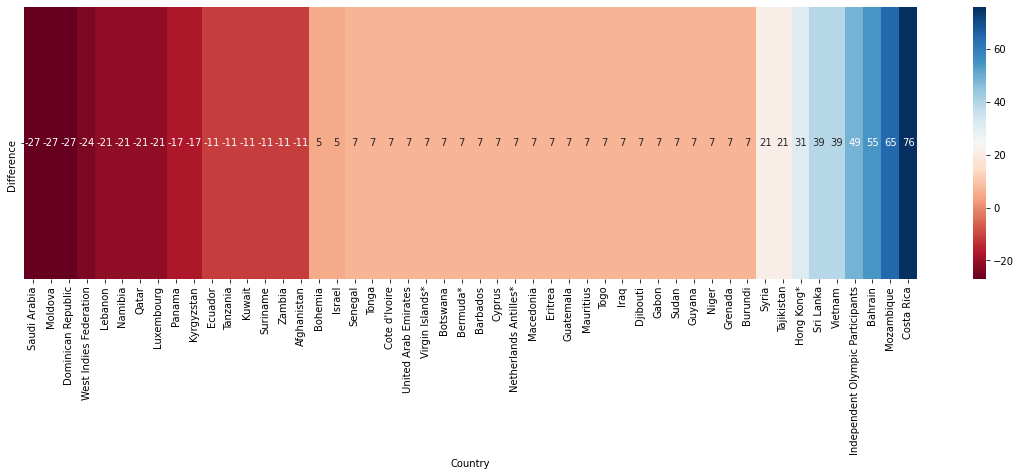

In [186]:
genderRankDiff = (top50['Men'] - top50['Women']).to_frame().rename(columns={0: 'Difference'}).sort_values('Difference')

plt.figure(figsize=(20,5))
sns.heatmap(genderRankDiff.T, cmap='RdBu', annot=True)
plt.show()

## Do Traditions matter?

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

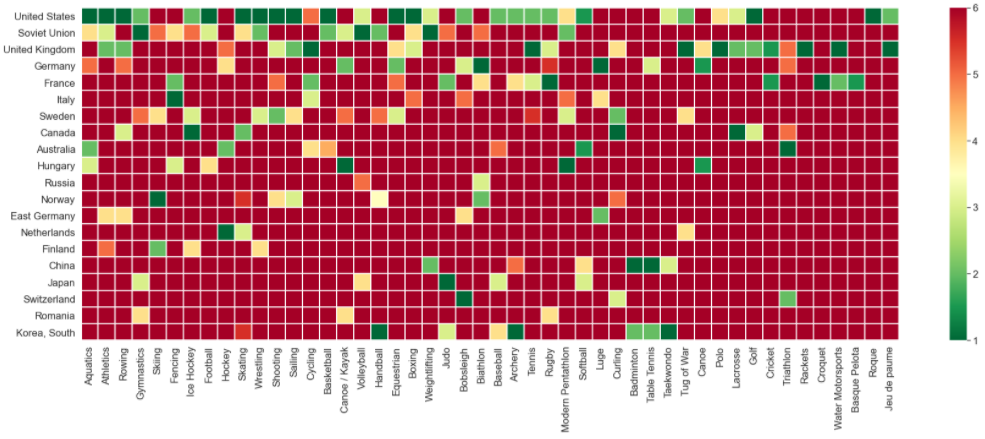

In [201]:
topXCountries = olympics['Country'].value_counts().head(25).index

bySport = pd.crosstab(index=olympics['Country'], columns=olympics['Sport'])
bySportRank = bySport.rank(ascending=False)
bySport = bySport.loc[topXCountries]
bySportRank = bySportRank.loc[topXCountries]

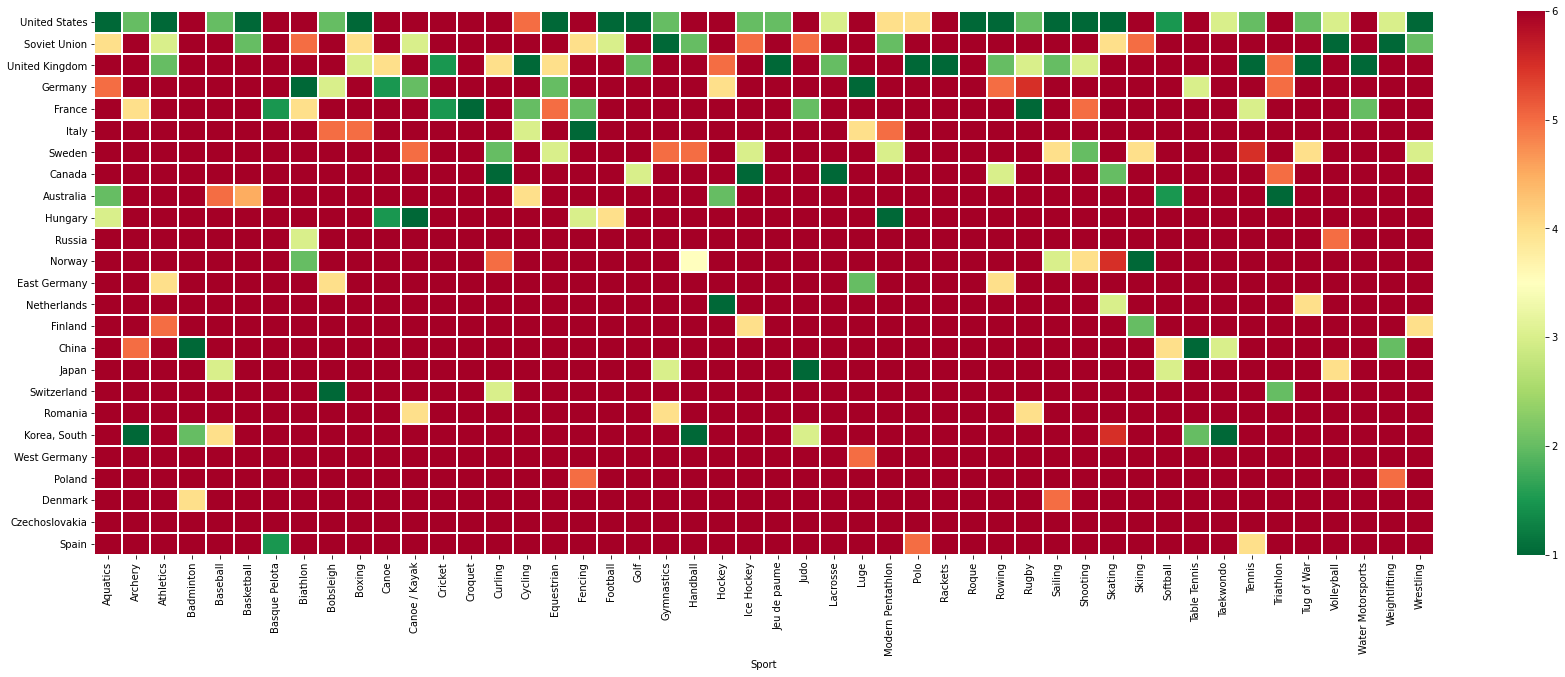

In [208]:
plt.figure(figsize=(30, 10))
sns.heatmap(bySportRank, cmap='RdYlGn_r', vmin=1, vmax=6, linewidth=1)
plt.show()

# Missing full Country Names (see Data Cleaning Part 1)

In [ ]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}